In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings(action = 'ignore')

In [12]:
preprocessed = pd.read_csv('신호위반_민원_단속카메라_전처리후.csv', encoding='cp949')

In [13]:
preprocessed

,위도,경도,구분,시도,시군구,지역
0,37.465612,127.974247,신호위반 단속카메라,강원특별자치도,횡성군,강원특별자치도 횡성군
1,38.121015,128.208753,신호위반 단속카메라,강원특별자치도,인제군,강원특별자치도 인제군
2,38.148825,127.300836,신호위반 단속카메라,강원특별자치도,철원군,강원특별자치도 철원군
3,37.836160,128.844213,신호위반 단속카메라,강원특별자치도,강릉시,강원특별자치도 강릉시
4,38.064880,128.175403,신호위반 단속카메라,강원특별자치도,인제군,강원특별자치도 인제군
...,...,...,...,...,...,...
79938,38.191803,128.579178,신호위반 민원,강원특별자치도,속초시,강원특별자치도 속초시
79939,35.126899,126.789615,신호위반 민원,광주,광산구,광주 광산구
79940,37.259304,127.104538,신호위반 민원,경기도,용인시,경기도 용인시
79941,37.466927,126.896164,신호위반 민원,서울,금천구,서울 금천구


In [14]:
preprocessed = preprocessed.groupby('지역', as_index = False)['구분'].count()

In [23]:
road = pd.read_csv('지적통계_행정구역별·지목별 국토이용현황_시군구 (2007 ~ 2022).csv', encoding='cp949')

In [24]:
road.columns

Index(['년(Annual)', '시도', '시군구', '계', '계.1', '전', '전.1', '답', '답.1', '과수원',
       '과수원.1', '목장용지', '목장용지.1', '임야', '임야.1', '광천지', '광천지.1', '염전', '염전.1',
       '대', '대.1', '공장용지', '공장용지.1', '학교용지', '학교용지.1', '주차장', '주차장.1', '주유소용지',
       '주유소용지.1', '창고용지', '창고용지.1', '도로', '도로 개수', '철도용지', '철도용지.1', '제방',
       '제방.1', '하천', '하천.1', '구거', '구거.1', '유지', '유지.1', '양어장', '양어장.1',
       '수도용지', '수도용지.1', '공원', '공원.1', '체육용지', '체육용지.1', '유원지', '유원지.1',
       '종교용지', '종교용지.1', '사적지', '사적지.1', '묘지', '묘지.1', '잡종지', '잡종지.1'],
      dtype='object')

In [25]:
road = road[['시도', '시군구', '도로 개수']]

In [26]:
road['지역'] = road['시도'] +' ' + road['시군구']

In [27]:
road = road[['지역', '도로 개수']]

In [28]:
road

,지역,도로 개수
0,서울 종로구,9852
1,서울 중구,7407
2,서울 용산구,9359
3,서울 성동구,4030
4,서울 광진구,4873
...,...,...
225,경상남도 함양군,47183
226,경상남도 거창군,47049
227,경상남도 합천군,50091
228,제주특별자치도 제주특별자치도시,125450


In [29]:
cctv = pd.read_csv('전국무인교통단속카메라표준데이터.csv', encoding='cp949')

In [30]:
cctv = cctv[cctv['단속구분'].isin(['02','2','01+02'])]

In [31]:
cctv['지역'] = cctv['시도명'] +' ' + cctv['시군구명']

In [32]:
cctv = cctv.groupby('지역', as_index = False)['무인교통단속카메라관리번호'].count()

In [33]:
cctv

,지역,무인교통단속카메라관리번호
0,강원특별자치도 강릉시,24
1,강원특별자치도 고성군,12
2,강원특별자치도 동해시,29
3,강원특별자치도 삼척시,16
4,강원특별자치도 속초시,28
...,...,...
224,충청북도 음성군,44
225,충청북도 제천시,22
226,충청북도 진천군,37
227,충청북도 청주시,235


In [34]:
result1 = pd.merge(cctv, road, on='지역', how='left')

In [35]:
result1

,지역,무인교통단속카메라관리번호,도로 개수
0,강원특별자치도 강릉시,24,32525.0
1,강원특별자치도 고성군,12,17839.0
2,강원특별자치도 동해시,29,8606.0
3,강원특별자치도 삼척시,16,29604.0
4,강원특별자치도 속초시,28,5124.0
...,...,...,...
224,충청북도 음성군,44,38534.0
225,충청북도 제천시,22,35232.0
226,충청북도 진천군,37,32830.0
227,충청북도 청주시,235,80660.0


In [36]:
result2 = pd.merge(result1, preprocessed, on='지역', how='inner')

In [37]:
result2

,지역,무인교통단속카메라관리번호,도로 개수,구분
0,강원특별자치도 강릉시,24,32525.0,239
1,강원특별자치도 고성군,12,17839.0,25
2,강원특별자치도 동해시,29,8606.0,119
3,강원특별자치도 삼척시,16,29604.0,41
4,강원특별자치도 속초시,28,5124.0,110
...,...,...,...,...
217,충청북도 음성군,44,38534.0,165
218,충청북도 제천시,22,35232.0,112
219,충청북도 진천군,37,32830.0,153
220,충청북도 청주시,235,80660.0,1865


In [42]:
result2['도로별/카메라'] = result2['도로 개수'] / result2['무인교통단속카메라관리번호']

In [43]:
result2

,지역,무인교통단속카메라관리번호,도로 개수,구분,면적/카메라,도로별/카메라
0,강원특별자치도 강릉시,24,32525.0,239,1355.208333,1355.208333
1,강원특별자치도 고성군,12,17839.0,25,1486.583333,1486.583333
2,강원특별자치도 동해시,29,8606.0,119,296.758621,296.758621
3,강원특별자치도 삼척시,16,29604.0,41,1850.250000,1850.250000
4,강원특별자치도 속초시,28,5124.0,110,183.000000,183.000000
...,...,...,...,...,...,...
217,충청북도 음성군,44,38534.0,165,875.772727,875.772727
218,충청북도 제천시,22,35232.0,112,1601.454545,1601.454545
219,충청북도 진천군,37,32830.0,153,887.297297,887.297297
220,충청북도 청주시,235,80660.0,1865,343.234043,343.234043


In [50]:
result2['비율'] = result2['구분'] / result2['도로별/카메라']

In [51]:
result2[['지역','비율']].sort_values(by = '비율', ascending = False).head(10)

,지역,비율
103,대전 서구,30.243877
29,경기도 성남시,28.714457
28,경기도 부천시,25.401708
139,서울 송파구,23.914154
159,인천 연수구,22.142960
30,경기도 수원시,21.362920
34,경기도 안양시,17.337644
158,인천 서구,16.309388
104,대전 유성구,15.210357
32,경기도 안산시,13.603775


In [52]:
result2['역비율'] =  result2['구분'] / result2['면적/카메라']

In [56]:
top = result2[['지역','비율']].sort_values(by = '비율', ascending = False).head(10)

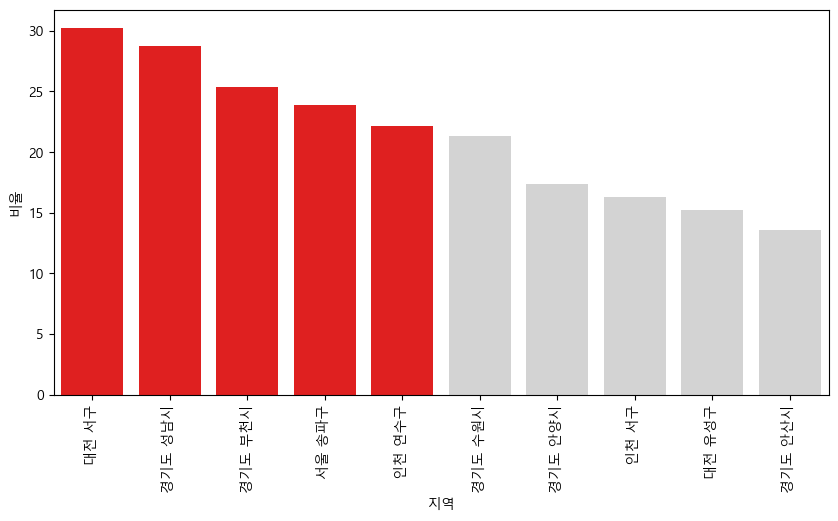

In [57]:
plt.figure(figsize = (10, 5))
palette = ['#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']
plt.xticks(rotation = 90)
sns.barplot(x = top['지역'],y = top['비율'], palette = palette)
plt.show()